Descriptive Statistics:
        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000  

Skewness:
Impressions            3.010185
Clicks                 2.712187
Spent                  2.708867
Tota

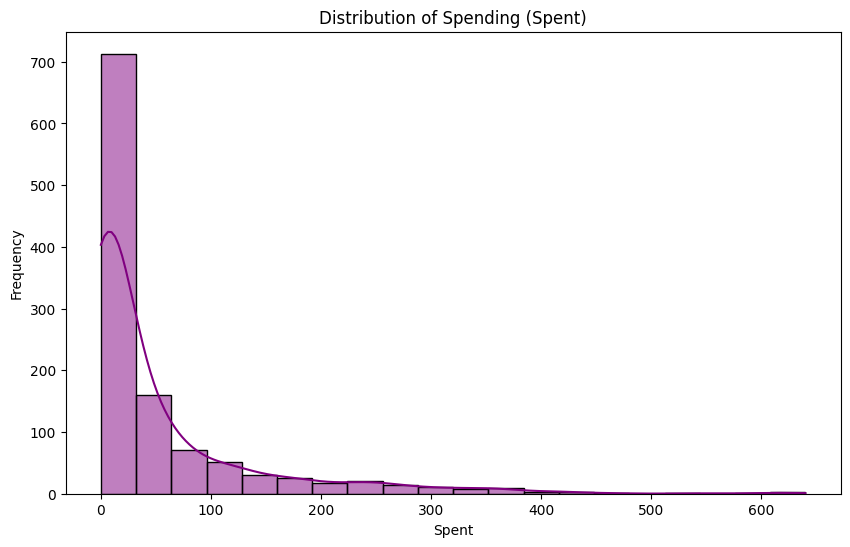

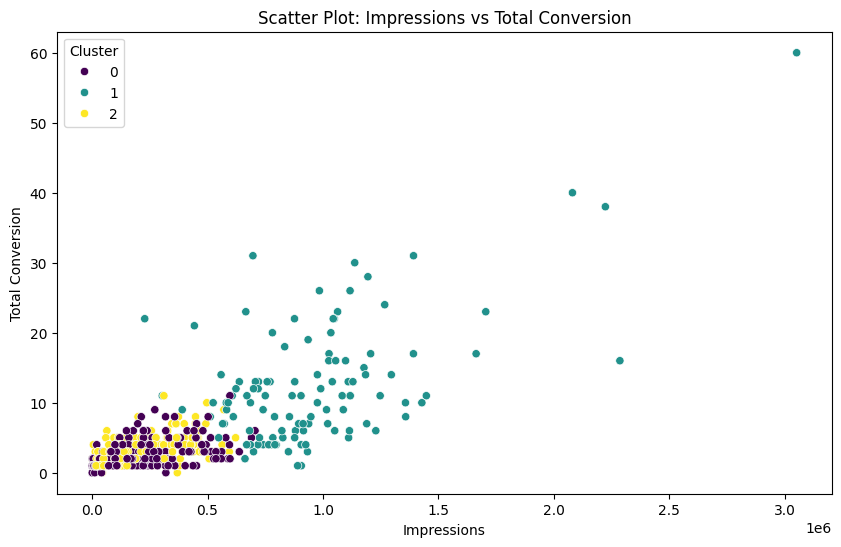

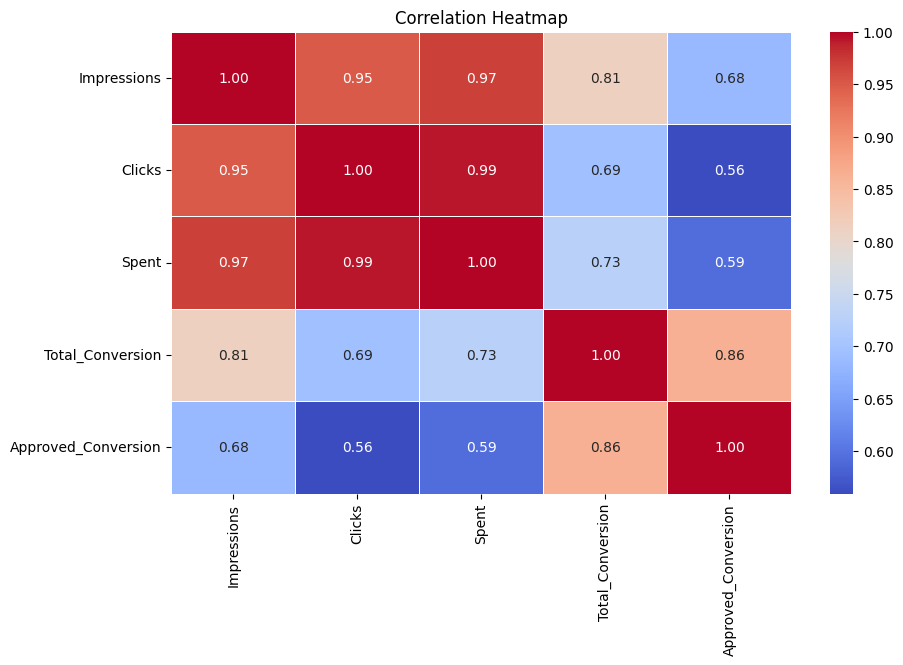

C:\Users\gf\AppData\Local\Temp\ipykernel_84188\3596876305.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Cluster'], y=data['Spent'], palette='Set2')


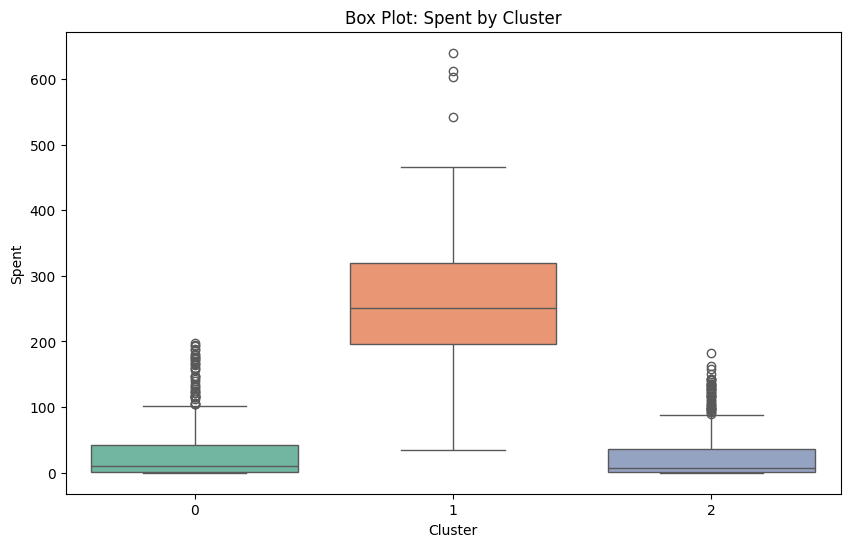

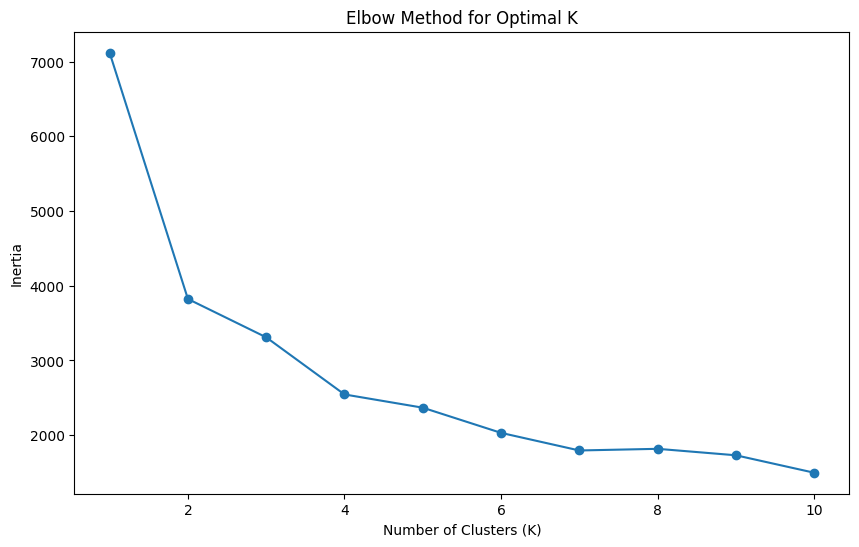

Silhouette Score: 0.2676984655934407


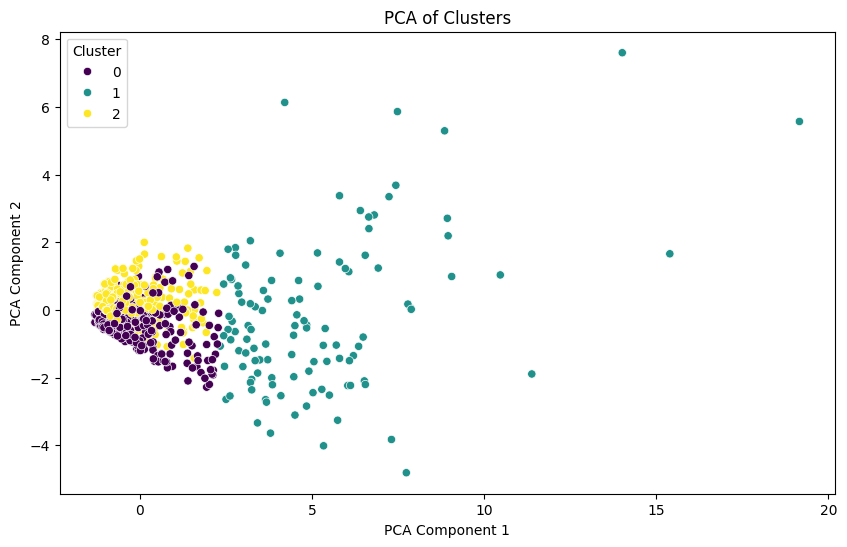

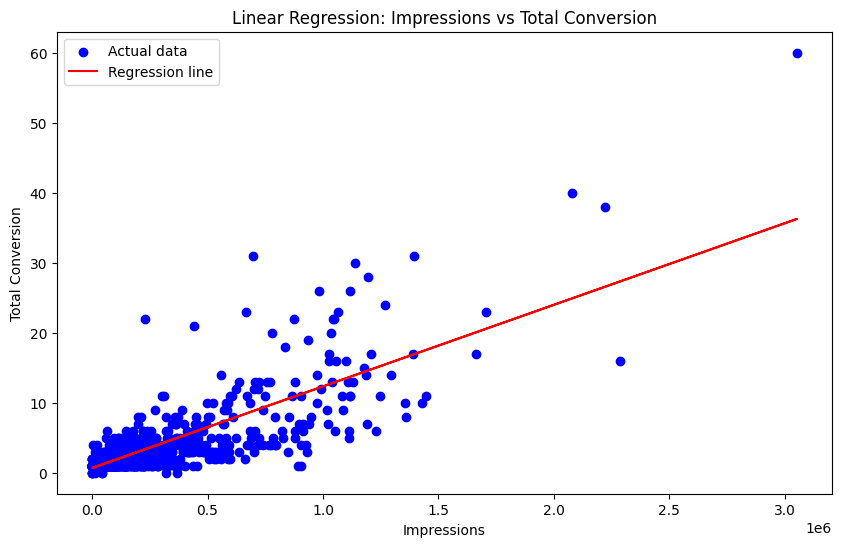

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = r'C:\Users\gf\Desktop\KAG_conversion_data.csv'
data = pd.read_csv(file_path)

# Drop missing values
data = data.dropna()

categorical_features = ['age', 'gender']
numerical_features = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

# columntransformer to apply scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)   # One-hot encode categorical features
    ])

# pipeline will includes scaling, encoding, and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Use 3 clusters for demonstration
])

# Fit the pipeline to the data
pipeline.fit(data)

# Predict the clusters
clusters = pipeline.predict(data)

# Add the cluster predictions to the original dataframe
data['Cluster'] = clusters

### Compute and Display Descriptive Statistics
def display_statistics():
    """Function to compute and display descriptive statistics."""
    desc_stats = data[numerical_features].describe()
    skewness = data[numerical_features].skew()
    kurtosis = data[numerical_features].kurtosis()
    
    print("Descriptive Statistics:")
    print(desc_stats)
    print("\nSkewness:")
    print(skewness)
    print("\nKurtosis:")
    print(kurtosis)

display_statistics()

### Correlation Matrix
def display_correlation():
    """Function to display correlation matrix."""
    corr_matrix = data[numerical_features].corr()
    print("\nCorrelation Matrix:")
    print(corr_matrix)

display_correlation()

### 1. Histogram
def plot_histogram():
    """Function to plot histogram of 'Spent'."""
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Spent'], kde=True, color='purple', bins=20)
    plt.title('Distribution of Spending (Spent)')
    plt.xlabel('Spent')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram()

### 2. Scatter Plot
def plot_scatter():
    """Function to plot scatter plot of Impressions vs Total Conversion."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Impressions'], y=data['Total_Conversion'], hue=data['Cluster'], palette='viridis')
    plt.title('Scatter Plot: Impressions vs Total Conversion')
    plt.xlabel('Impressions')
    plt.ylabel('Total Conversion')
    plt.legend(title='Cluster')
    plt.show()

plot_scatter()

### 3. Heatmap
def plot_heatmap():
    """Function to plot heatmap of the correlation matrix."""
    plt.figure(figsize=(10, 6))
    corr = data[numerical_features].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

def plot_boxplot():
    """Function to plot boxplot of 'Spent' by 'Cluster'."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Cluster'], y=data['Spent'], palette='Set2')
    plt.title('Box Plot: Spent by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Spent')
    plt.show()

plot_boxplot()

### 4. Elbow
def plot_elbow():
    """Function to plot Elbow Method to find optimal number of clusters."""
    # Apply the preprocessor to the data for the elbow method
    data_transformed = preprocessor.fit_transform(data)

    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_transformed)  # Fit the model on the transformed data
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow()

def plot_silhouette():
    """Function to plot silhouette score."""
    # Apply the preprocessor to the data for silhouette score
    data_transformed = preprocessor.fit_transform(data)
    silhouette_avg = silhouette_score(data_transformed, clusters)
    print(f"Silhouette Score: {silhouette_avg}")

plot_silhouette()

def plot_pca():
    """Function to perform PCA and plot the clusters."""
    data_transformed = preprocessor.fit_transform(data)
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data_transformed)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('PCA of Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

plot_pca()

### Linear Regression
def plot_regression():
    """Function to perform linear regression and plot the results."""
    X = data[['Impressions']]  # Feature
    y = data['Total_Conversion']  # Target

    # Initialize and fit the regression model
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Predictions
    y_pred = regressor.predict(X)

    # Visualizing the regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', label='Regression line')
    plt.title('Linear Regression: Impressions vs Total Conversion')
    plt.xlabel('Impressions')
    plt.ylabel('Total Conversion')
    plt.legend()
    plt.show()

plot_regression()